In [1]:
!pip install vaderSentiment

In [2]:
!pip install dash

In [144]:
#Basic libraries
import pandas as pd 
import numpy as np 
from datetime import datetime, timedelta
#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE
#vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



In [252]:
raw_reviews = pd.read_csv('reviews.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(1900, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            1900 non-null   object
 1   countryCode        870 non-null    object
 2   date               1900 non-null   object
 3   isVerified         1900 non-null   bool  
 4   position           1900 non-null   int64 
 5   productAsin        1900 non-null   object
 6   ratingScore        1900 non-null   int64 
 7   reviewDescription  1886 non-null   object
 8   reviewImages/0     191 non-null    object
 9   reviewImages/1     61 non-null     object
 10  reviewImages/2     27 non-null     object
 11  reviewImages/3     14 non-null     object
 12  reviewImages/4     7 non-null      object
 13  reviewImages/5     1 non-null      object
 14  reviewReaction     770 non-null    object
 15  reviewTitle        1899 non-null   obj

In [253]:
raw_reviews=raw_reviews.drop(['country', 'countryCode','isVerified',
                              'position', 'productAsin','reviewImages/0','reviewImages/1',
                              'reviewImages/2','reviewImages/3','reviewImages/4','reviewImages/5',
                              'reviewReaction','reviewUrl','reviewedIn','variant'] , axis=1)
raw_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               1900 non-null   object
 1   ratingScore        1900 non-null   int64 
 2   reviewDescription  1886 non-null   object
 3   reviewTitle        1899 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.5+ KB


In [254]:
processed_reviews=raw_reviews.dropna()
processed_reviews['date']=processed_reviews['date'].astype('datetime64[ns]')
processed_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1899
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1886 non-null   datetime64[ns]
 1   ratingScore        1886 non-null   int64         
 2   reviewDescription  1886 non-null   object        
 3   reviewTitle        1886 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 73.7+ KB


In [255]:
sid_obj= SentimentIntensityAnalyzer()
processed_reviews["day"]=processed_reviews["date"].dt.day_name()
processed_reviews['year'] = processed_reviews['date'].dt.year
processed_reviews['month'] = processed_reviews['date'].dt.month_name()


In [256]:
#new = processed_reviews[].str.split(" ", n = 10, expand = True) 
#print(new)

#processed_reviews["date"]= new[2]

#processed_reviews["year"]= new[5]
#processed_reviews["month"]= new[1]
print(processed_reviews["date"])
#processed_reviews["year"]=processed_reviews["year"].apply(lambda x: int(x))
#processed_reviews=processed_reviews.drop(['location_and_date'], axis=1)
processed_reviews.info()
#processed_reviews=processed_reviews.dropna()
processed_reviews["year"]=processed_reviews["year"].apply(lambda x: pd.to_datetime(str(x), format='%Y'))
#processed_reviews["year"]=str(processed_reviews["year"])
processed_reviews.info()
print(processed_reviews["year"].min())
print(processed_reviews["year"].max())

0      2023-05-26
1      2020-11-13
2      2023-04-04
3      2023-05-15
4      2021-03-06
          ...    
1894   2022-06-24
1895   2022-09-08
1897   2021-06-26
1898   2022-09-11
1899   2021-03-26
Name: date, Length: 1886, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1899
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1886 non-null   datetime64[ns]
 1   ratingScore        1886 non-null   int64         
 2   reviewDescription  1886 non-null   object        
 3   reviewTitle        1886 non-null   object        
 4   day                1886 non-null   object        
 5   year               1886 non-null   int64         
 6   month              1886 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 117.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1899
Data col

In [257]:
clean_reviews=processed_reviews.copy()
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [258]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [259]:
processed_reviews['reviewDescription']=processed_reviews['reviewDescription'].apply(lambda x:review_cleaning(x))
processed_reviews.head()

date  ratingScore                                  reviewDescription  \
0 2023-05-26            5  just got the series x today less than  hours o...   
1 2020-11-13            4  so yeah new generation of hardware from micros...   
2 2023-04-04            4  are you ready for a gaming experience unlike a...   
3 2023-05-15            5  i gotta say when i received the invite to purc...   
4 2021-03-06            5  i have been a gammer all my life have owned al...   

                                         reviewTitle       day       year  \
0                          Waited too long for this!    Friday 2023-01-01   
1                               A+ box presentation!    Friday 2020-01-01   
2                        The Ultimate Gaming Machine   Tuesday 2023-01-01   
3                         This thing is bonkers fast    Monday 2023-01-01   
4  Xbox SeriesX =  amazing console, absolute BEAS...  Saturday 2021-01-01   

      month  
0       May  
1  November  
2     April  
3       May  
4     March

In [260]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']
processed_reviews['reviewDescription'] = processed_reviews['reviewDescription'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])
)
processed_reviews.head()

date  ratingScore                                  reviewDescription  \
0 2023-05-26            5  got series x today less hours placing order i’...   
1 2020-11-13            4  yeah new generation hardware microsoft but tal...   
2 2023-04-04            4  ready gaming experience unlike xbox series x r...   
3 2023-05-15            5  gotta say received invite purchase one serious...   
4 2021-03-06            5  gammer life owned almost every console since a...   

                                         reviewTitle       day       year  \
0                          Waited too long for this!    Friday 2023-01-01   
1                               A+ box presentation!    Friday 2020-01-01   
2                        The Ultimate Gaming Machine   Tuesday 2023-01-01   
3                         This thing is bonkers fast    Monday 2023-01-01   
4  Xbox SeriesX =  amazing console, absolute BEAS...  Saturday 2021-01-01   

      month  
0       May  
1  November  
2     April  
3       May  
4     March

In [261]:
cs = []
for row in range(len(processed_reviews)):
    cs.append(sid_obj.polarity_scores(processed_reviews['reviewDescription'].iloc[row])['compound'])

processed_reviews['compound'] = cs
processed_reviews['compound'].head()


0    0.9850
1    0.9995
2    0.9969
3    0.9955
4    0.9987
Name: compound, dtype: float64

In [262]:
processed_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1886 non-null   datetime64[ns]
 1   ratingScore        1886 non-null   int64         
 2   reviewDescription  1886 non-null   object        
 3   reviewTitle        1886 non-null   object        
 4   day                1886 non-null   object        
 5   year               1886 non-null   datetime64[ns]
 6   month              1886 non-null   object        
 7   compound           1886 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 132.6+ KB


In [263]:

        
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['compound'] >= 0.05:
        val = 'Positive'
    elif row['compound'] <= -0.05:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val
 
 
processed_reviews['sentiment'] = processed_reviews.apply(f, axis=1)

In [264]:
processed_reviews.head(15)

date  ratingScore                                  reviewDescription  \
0  2023-05-26            5  got series x today less hours placing order i’...   
1  2020-11-13            4  yeah new generation hardware microsoft but tal...   
2  2023-04-04            4  ready gaming experience unlike xbox series x r...   
3  2023-05-15            5  gotta say received invite purchase one serious...   
4  2021-03-06            5  gammer life owned almost every console since a...   
5  2023-05-05            5  coming xbox one thing amazing like graphics am...   
6  2021-09-22            5  started og xbox years old cause dad bought bou...   
7  2020-11-28            5  back microsoft sony launched xbox one playstat...   
8  2023-02-23            5  look either going buy xbox not isnt random fee...   
9  2023-06-01            5  love xbox series x super fast great games wish...   
10 2022-11-15            5  item arrived fast manner well packaged exactly...   
11 2022-07-20            5  invitation order list took week two eligible b...   
13 2022-10-24            5  love xbox favorite purchase but expensive load...   
14 2022-09-03            4                                   alot better rest   
15 2022-10-09            5  system came brand new sealed box worked perfec...   

                                          reviewTitle        day       year  \
0                           Waited too long for this!     Friday 2023-01-01   
1                                A+ box presentation!     Friday 2020-01-01   
2                         The Ultimate Gaming Machine    Tuesday 2023-01-01   
3                          This thing is bonkers fast     Monday 2023-01-01   
4   Xbox SeriesX =  amazing console, absolute BEAS...   Saturday 2021-01-01   
5                                  Fast loading times     Friday 2023-01-01   
6           From someone who owned a PS4 and Xbox One  Wednesday 2021-01-01   
7                       Next-Gen Done and Begun Right   Saturday 2020-01-01   
8    This review isn't going to help you off a fence.   Thursday 2023-01-01   
9                                        Love my Xbox   Thursday 2023-01-01   
10                Excellent product and fast shipping    Tuesday 2022-01-01   
11                                 Works as expected!  Wednesday 2022-01-01   
13                       Just as powerful as they say     Monday 2022-01-01   
14                                 Faster downloading   Saturday 2022-01-01   
15           It's working perfectly and was Brand new     Sunday 2022-01-01   

        month  compound sentiment  
0         May    0.9850  Positive  
1    November    0.9995  Positive  
2       April    0.9969  Positive  
3         May    0.9955  Positive  
4       March    0.9987  Positive  
5         May    0.9918  Positive  
6   September    0.9971  Positive  
7    November    0.9988  Positive  
8    February    0.9810  Positive  
9        June    0.9423  Positive  
10   November    0.2732  Positive  
11       July    0.5218  Positive  
13    October    0.7899  Positive  
14  September    0.4404  Positive  
15    October    0.7351  Positive

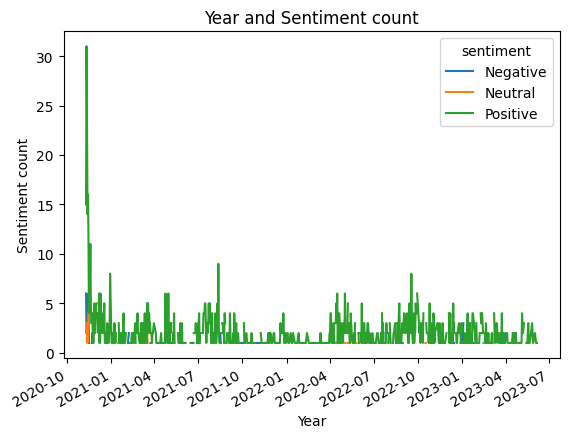

In [265]:
processed_reviews.groupby(['date','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [208]:
temp = processed_reviews.groupby('sentiment').count()['reviewDescription'].reset_index().sort_values(by='reviewDescription',
                                                                                                     ascending=False)
temp.style.background_gradient(cmap='Purples')

<Axes: xlabel='sentiment', ylabel='count'>

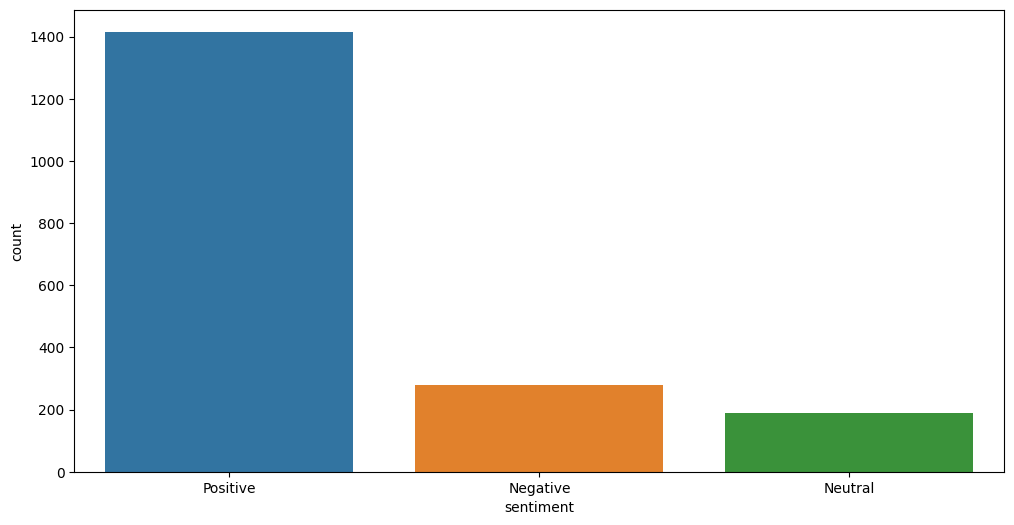

In [209]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=processed_reviews)

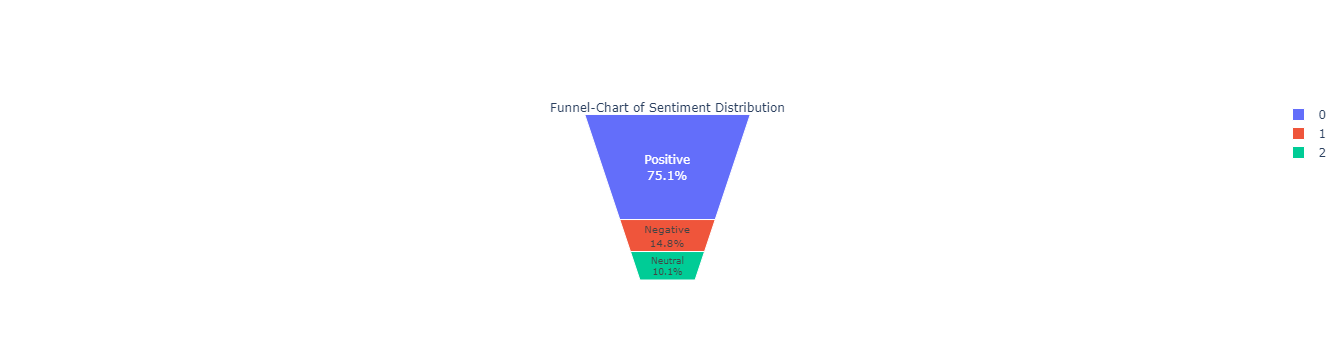

In [210]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.reviewDescription,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

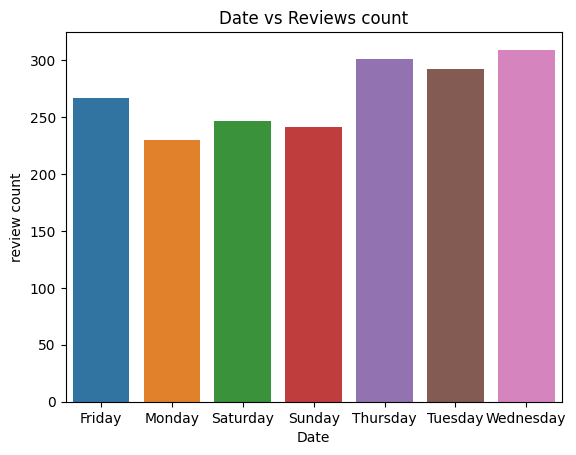

In [211]:
day=pd.DataFrame(processed_reviews.groupby('day')['reviewDescription'].count()).reset_index()
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviewDescription", data=day)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('review count')
plt.show()


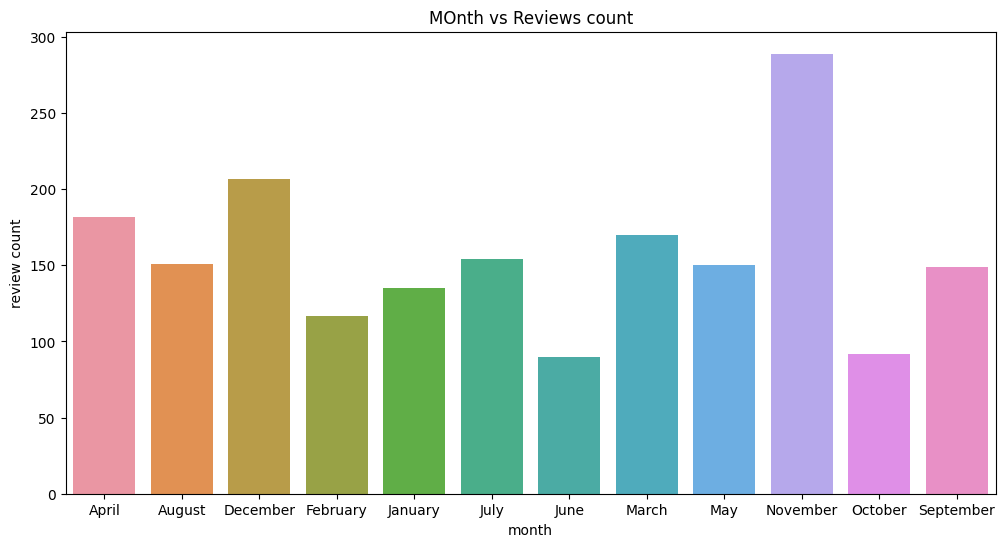

In [267]:
month=pd.DataFrame(processed_reviews.groupby('month')['reviewDescription'].count()).reset_index()
#day['day']=day['date'].astype('int64')
month.sort_values(by=['month'])

#Plotting the graph
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="month", y="reviewDescription", data=month,ax=ax)
plt.title('MOnth vs Reviews count')
plt.xlabel('month')
plt.ylabel('review count')
plt.show()


In [213]:
processed_reviews['polarity'] = processed_reviews['reviewDescription'].map(lambda text: TextBlob(text).sentiment.polarity)
processed_reviews['review_len'] = processed_reviews['reviewDescription'].astype(str).apply(len)
processed_reviews['word_count'] = processed_reviews['reviewDescription'].apply(lambda x: len(str(x).split()))
processed_reviews.head()

date  ratingScore                                  reviewDescription  \
0 2023-05-26            5  got series x today less hours placing order i’...   
1 2020-11-13            4  yeah new generation hardware microsoft but tal...   
2 2023-04-04            4  ready gaming experience unlike xbox series x r...   
3 2023-05-15            5  gotta say received invite purchase one serious...   
4 2021-03-06            5  gammer life owned almost every console since a...   

                                         reviewTitle       day       year  \
0                          Waited too long for this!    Friday 2023-01-01   
1                               A+ box presentation!    Friday 2020-01-01   
2                        The Ultimate Gaming Machine   Tuesday 2023-01-01   
3                         This thing is bonkers fast    Monday 2023-01-01   
4  Xbox SeriesX =  amazing console, absolute BEAS...  Saturday 2021-01-01   

      month  compound sentiment  polarity  review_len  word_count  
0       May    0.9850  Positive  0.201999         846         135  
1  November    0.9995  Positive  0.205234        3347         511  
2     April    0.9969  Positive  0.255104        1464         206  
3       May    0.9955  Positive  0.101984         646          99  
4     March    0.9987  Positive  0.228469        2625         407

In [214]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

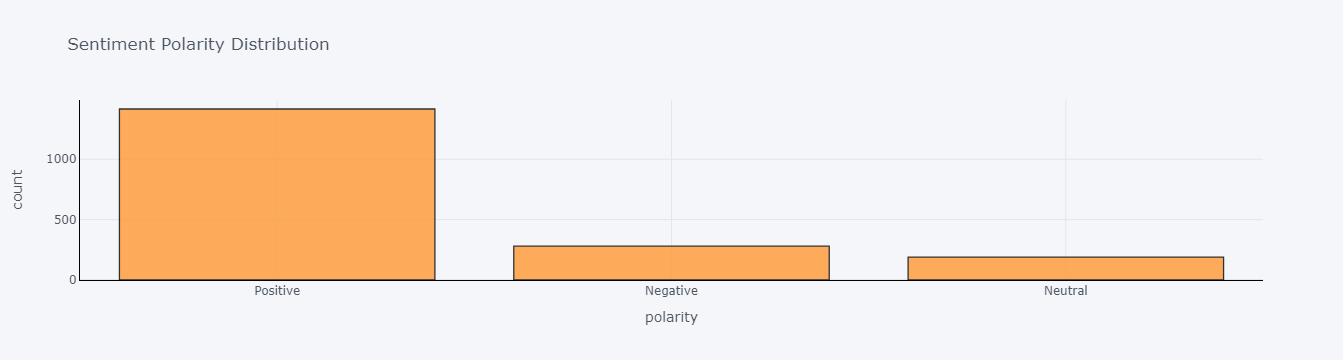

In [215]:
processed_reviews['sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

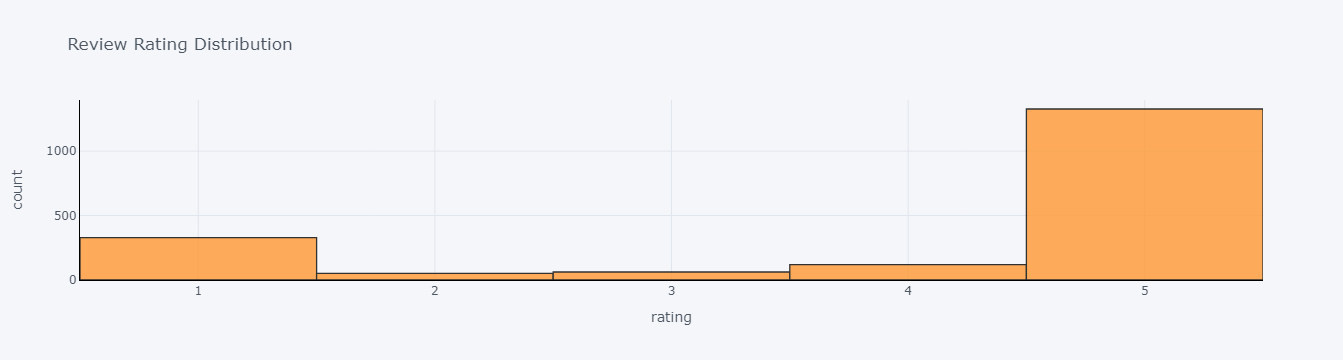

In [269]:
processed_reviews['ratingScore'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

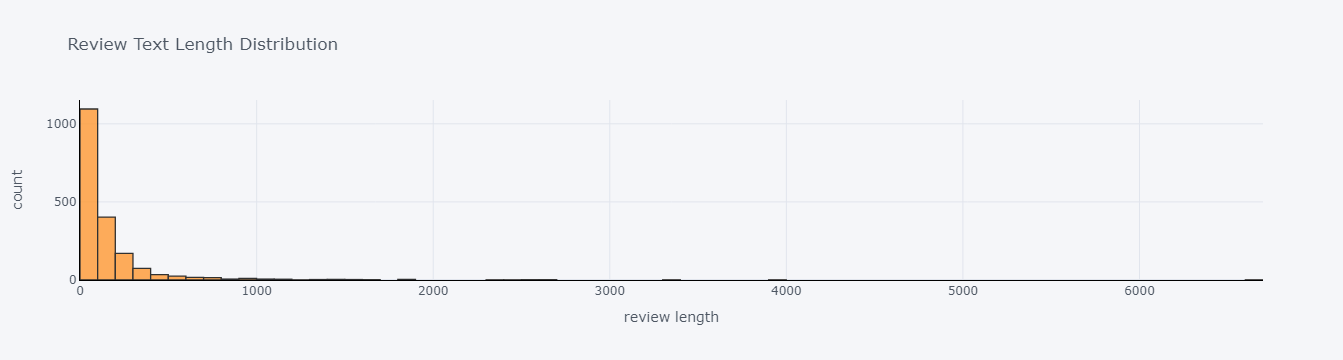

In [217]:
processed_reviews['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

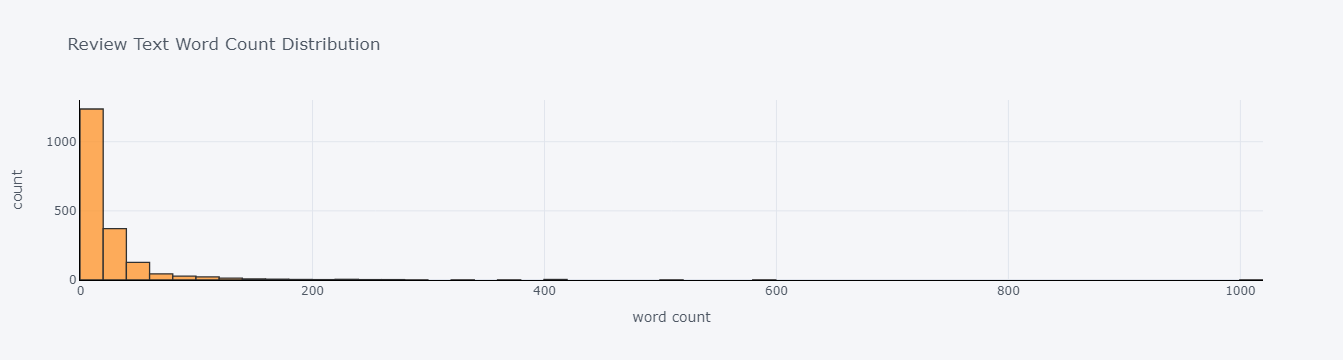

In [218]:
processed_reviews['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

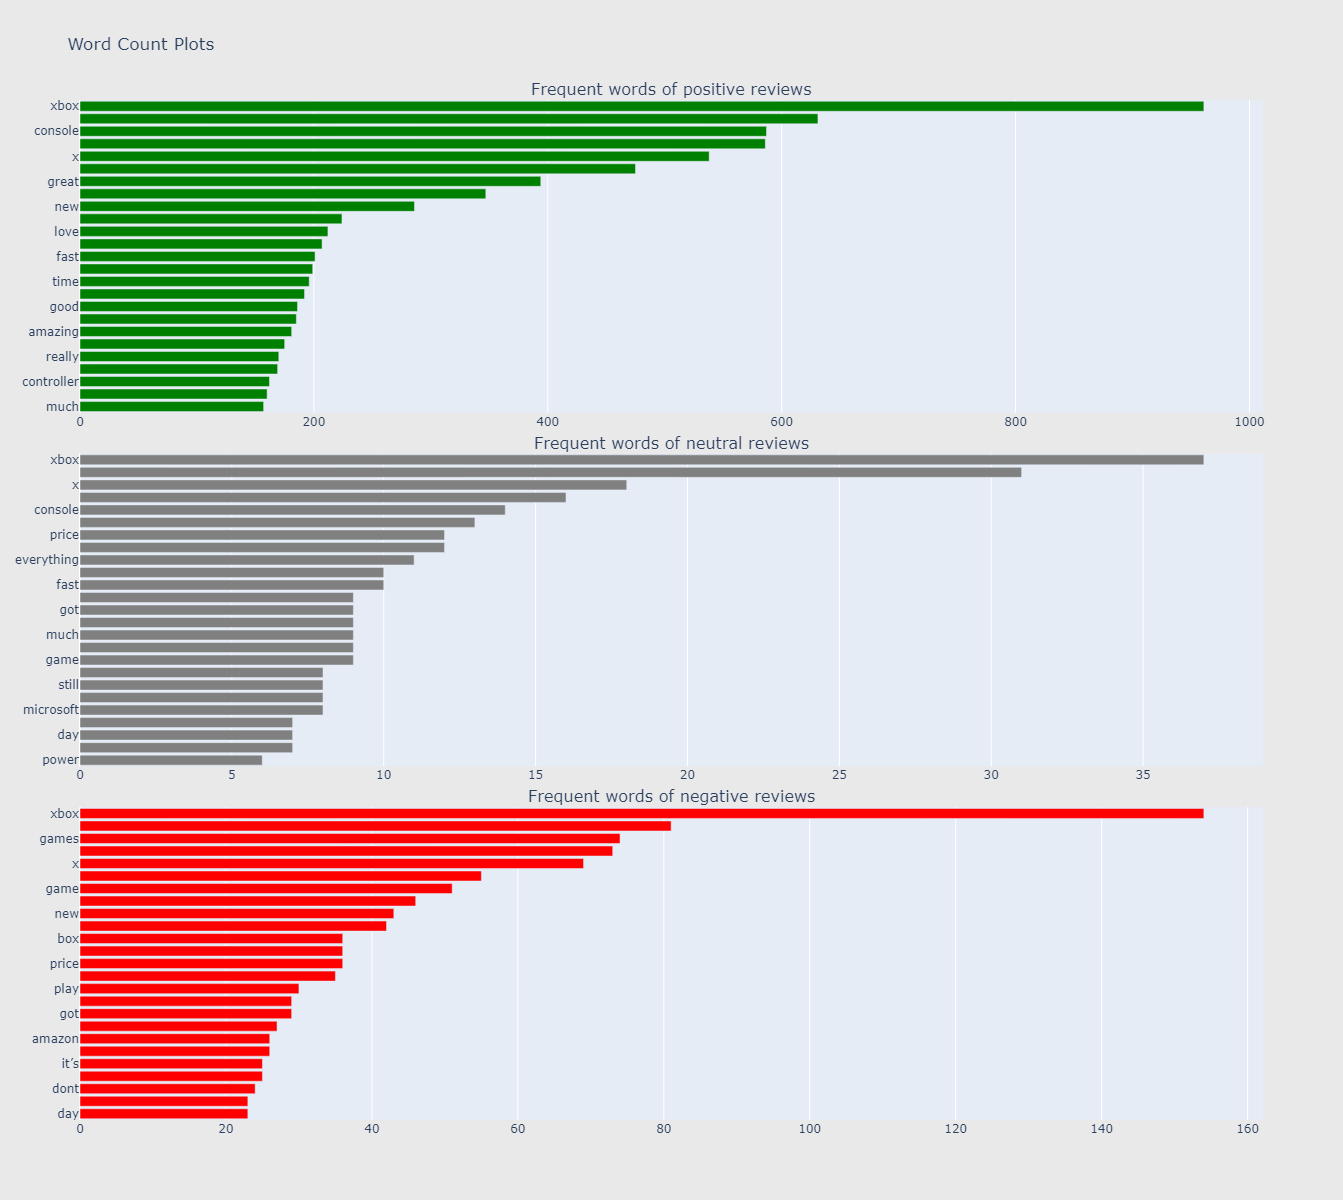

In [219]:
#Filtering data
review_pos = processed_reviews[processed_reviews["sentiment"]=='Positive'].dropna()
review_neu = processed_reviews[processed_reviews["sentiment"]=='Neutral'].dropna()
review_neg = processed_reviews[processed_reviews["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviewDescription"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviewDescription"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviewDescription"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

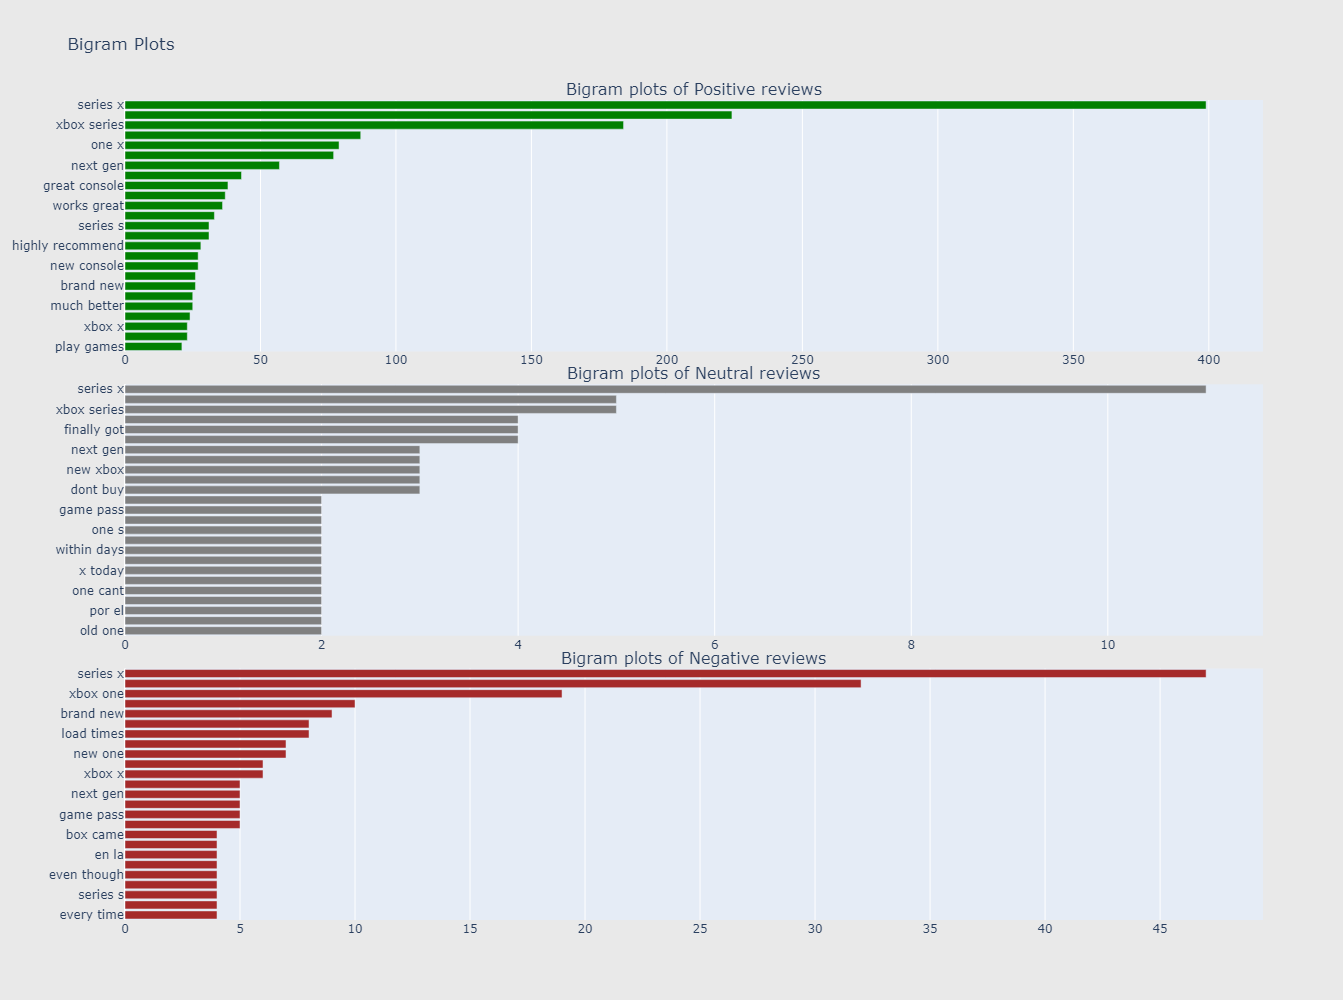

In [272]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviewDescription"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviewDescription"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviewDescription"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

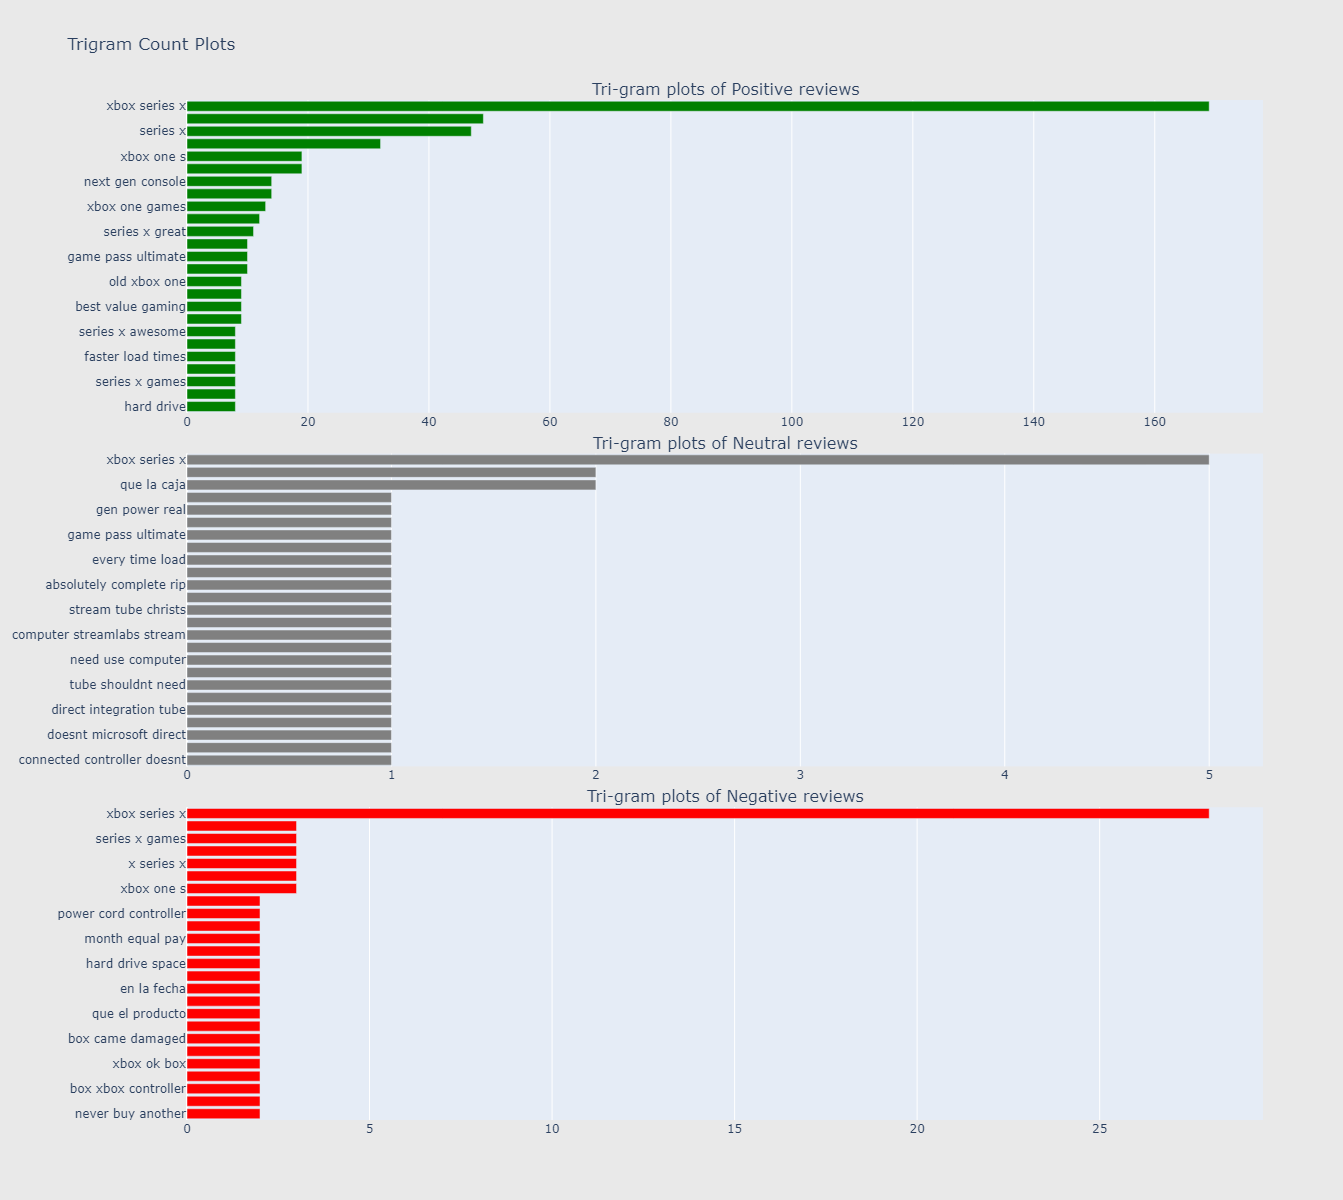

In [221]:
## Get the bar chart from positive reviews ##
for sent in review_pos["reviewDescription"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviewDescription"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviewDescription"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')


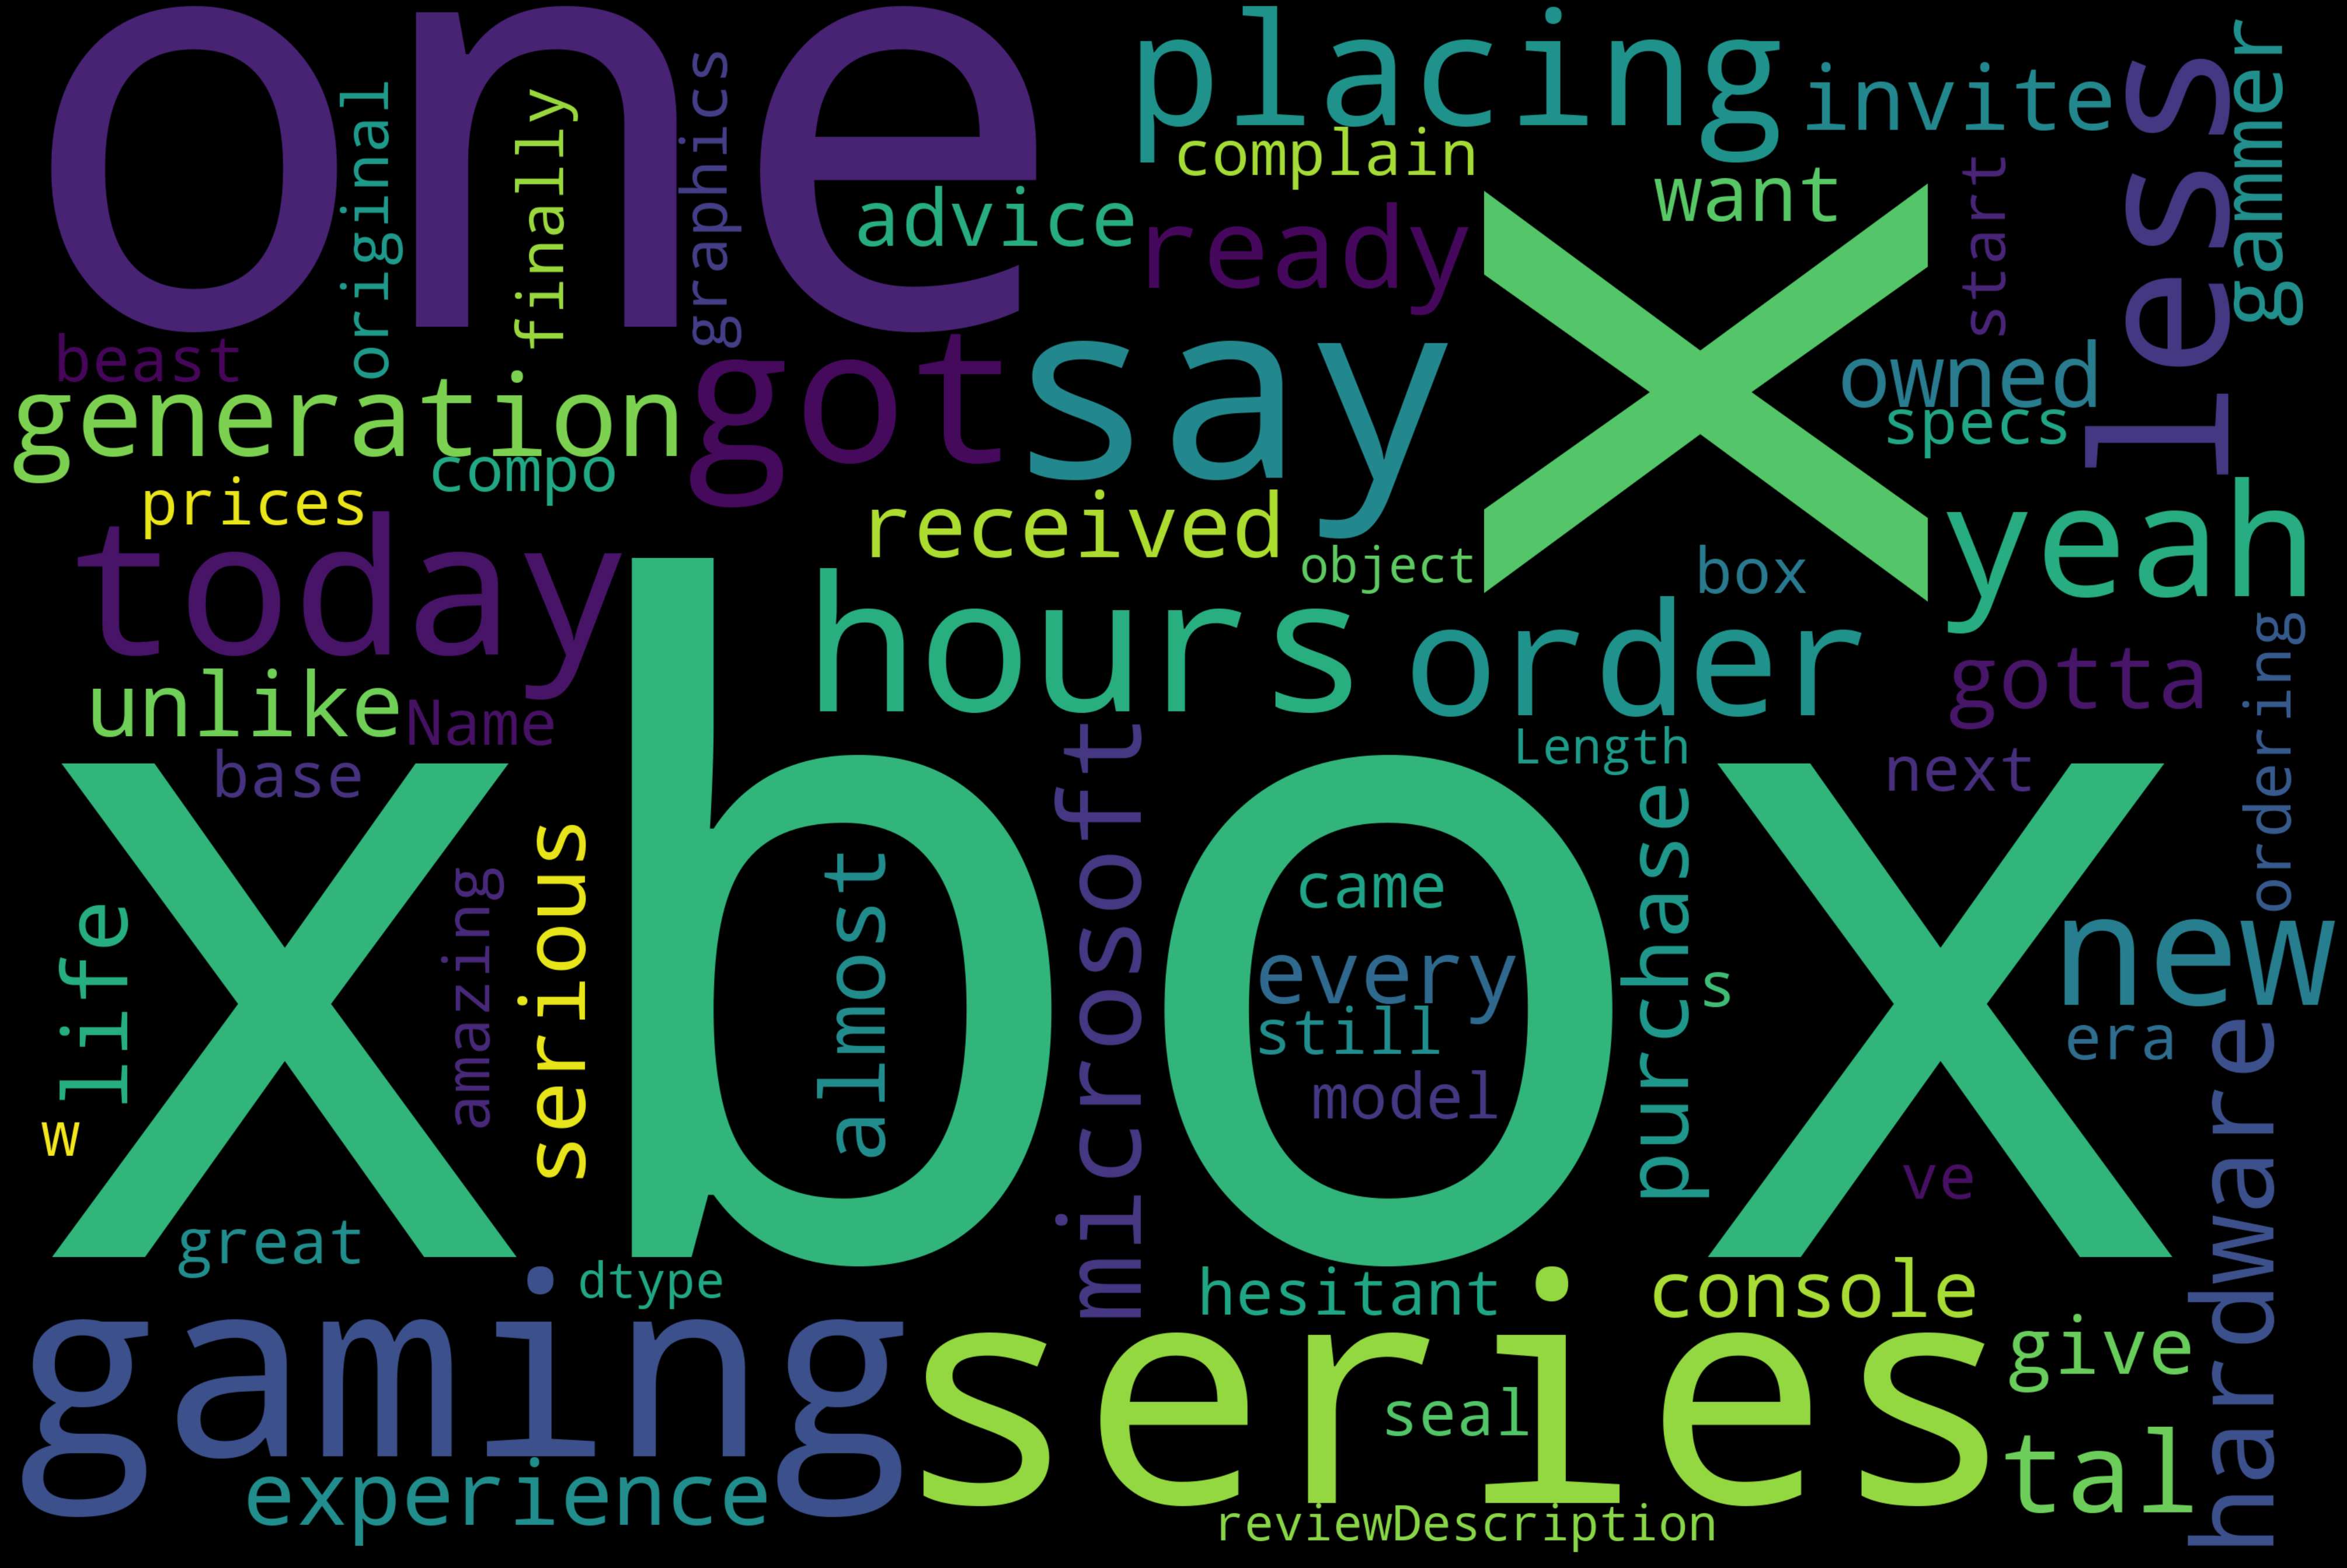

In [222]:
text = review_pos["reviewDescription"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


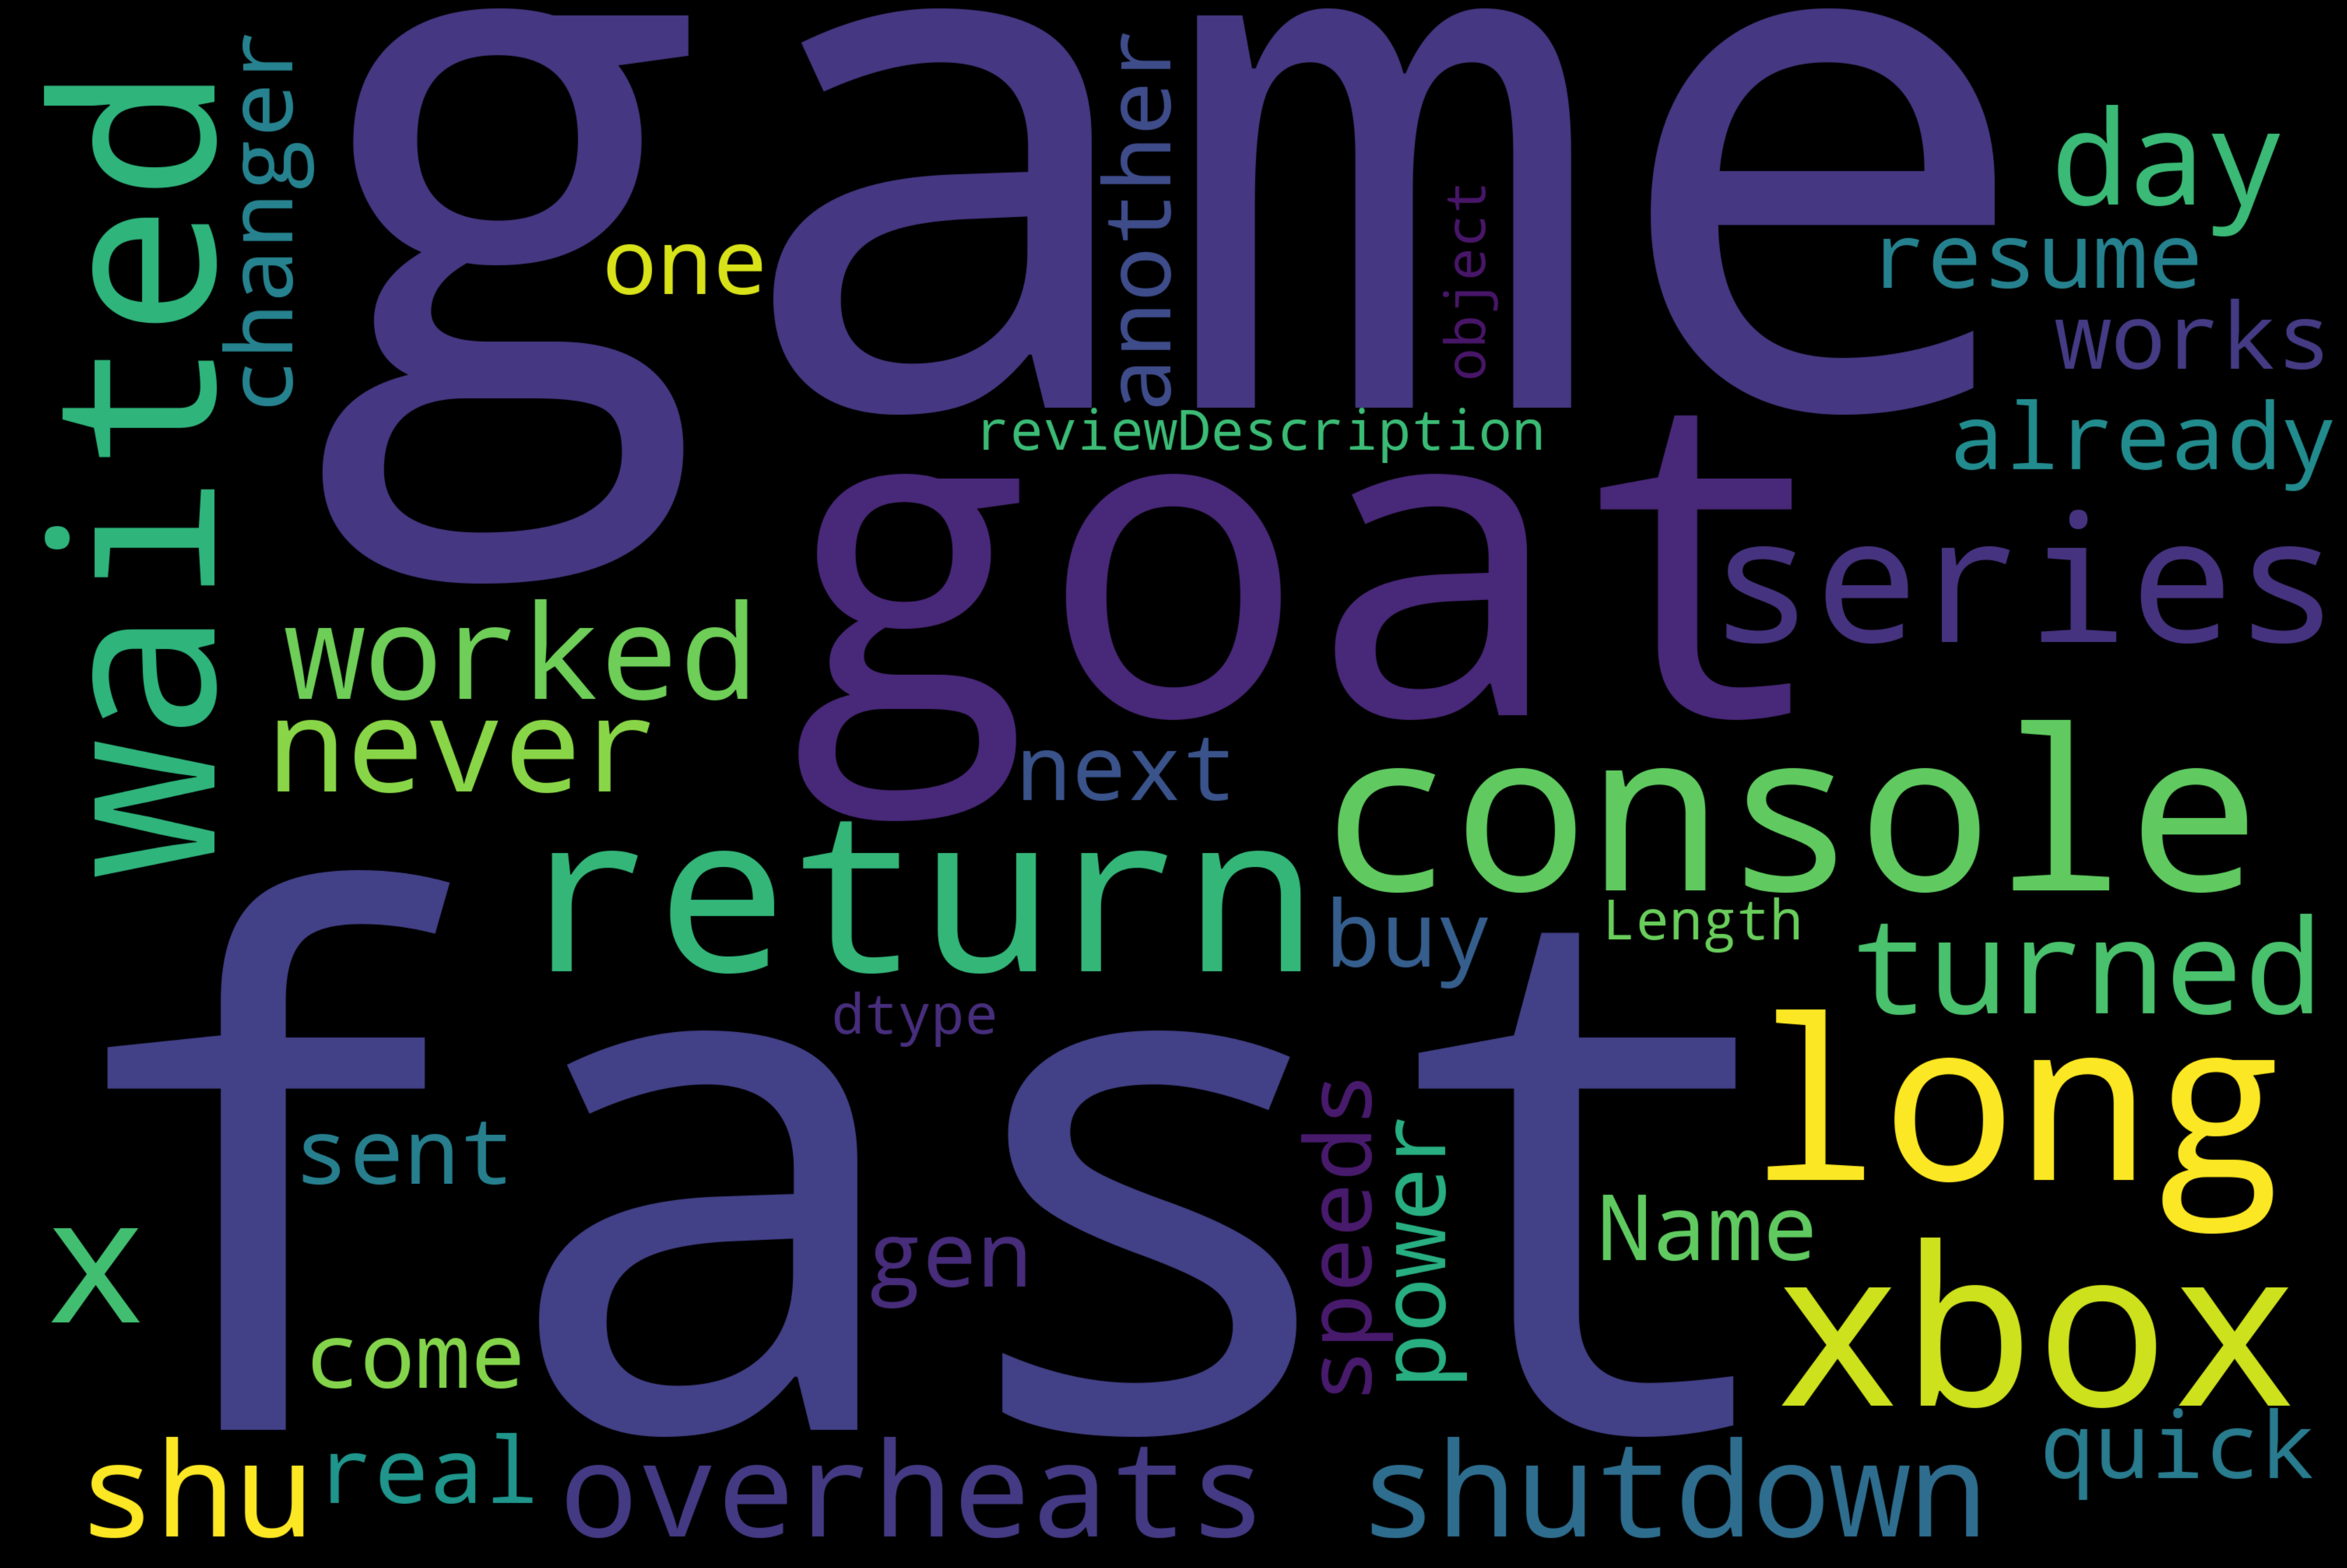

In [223]:
text = review_neu["reviewDescription"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

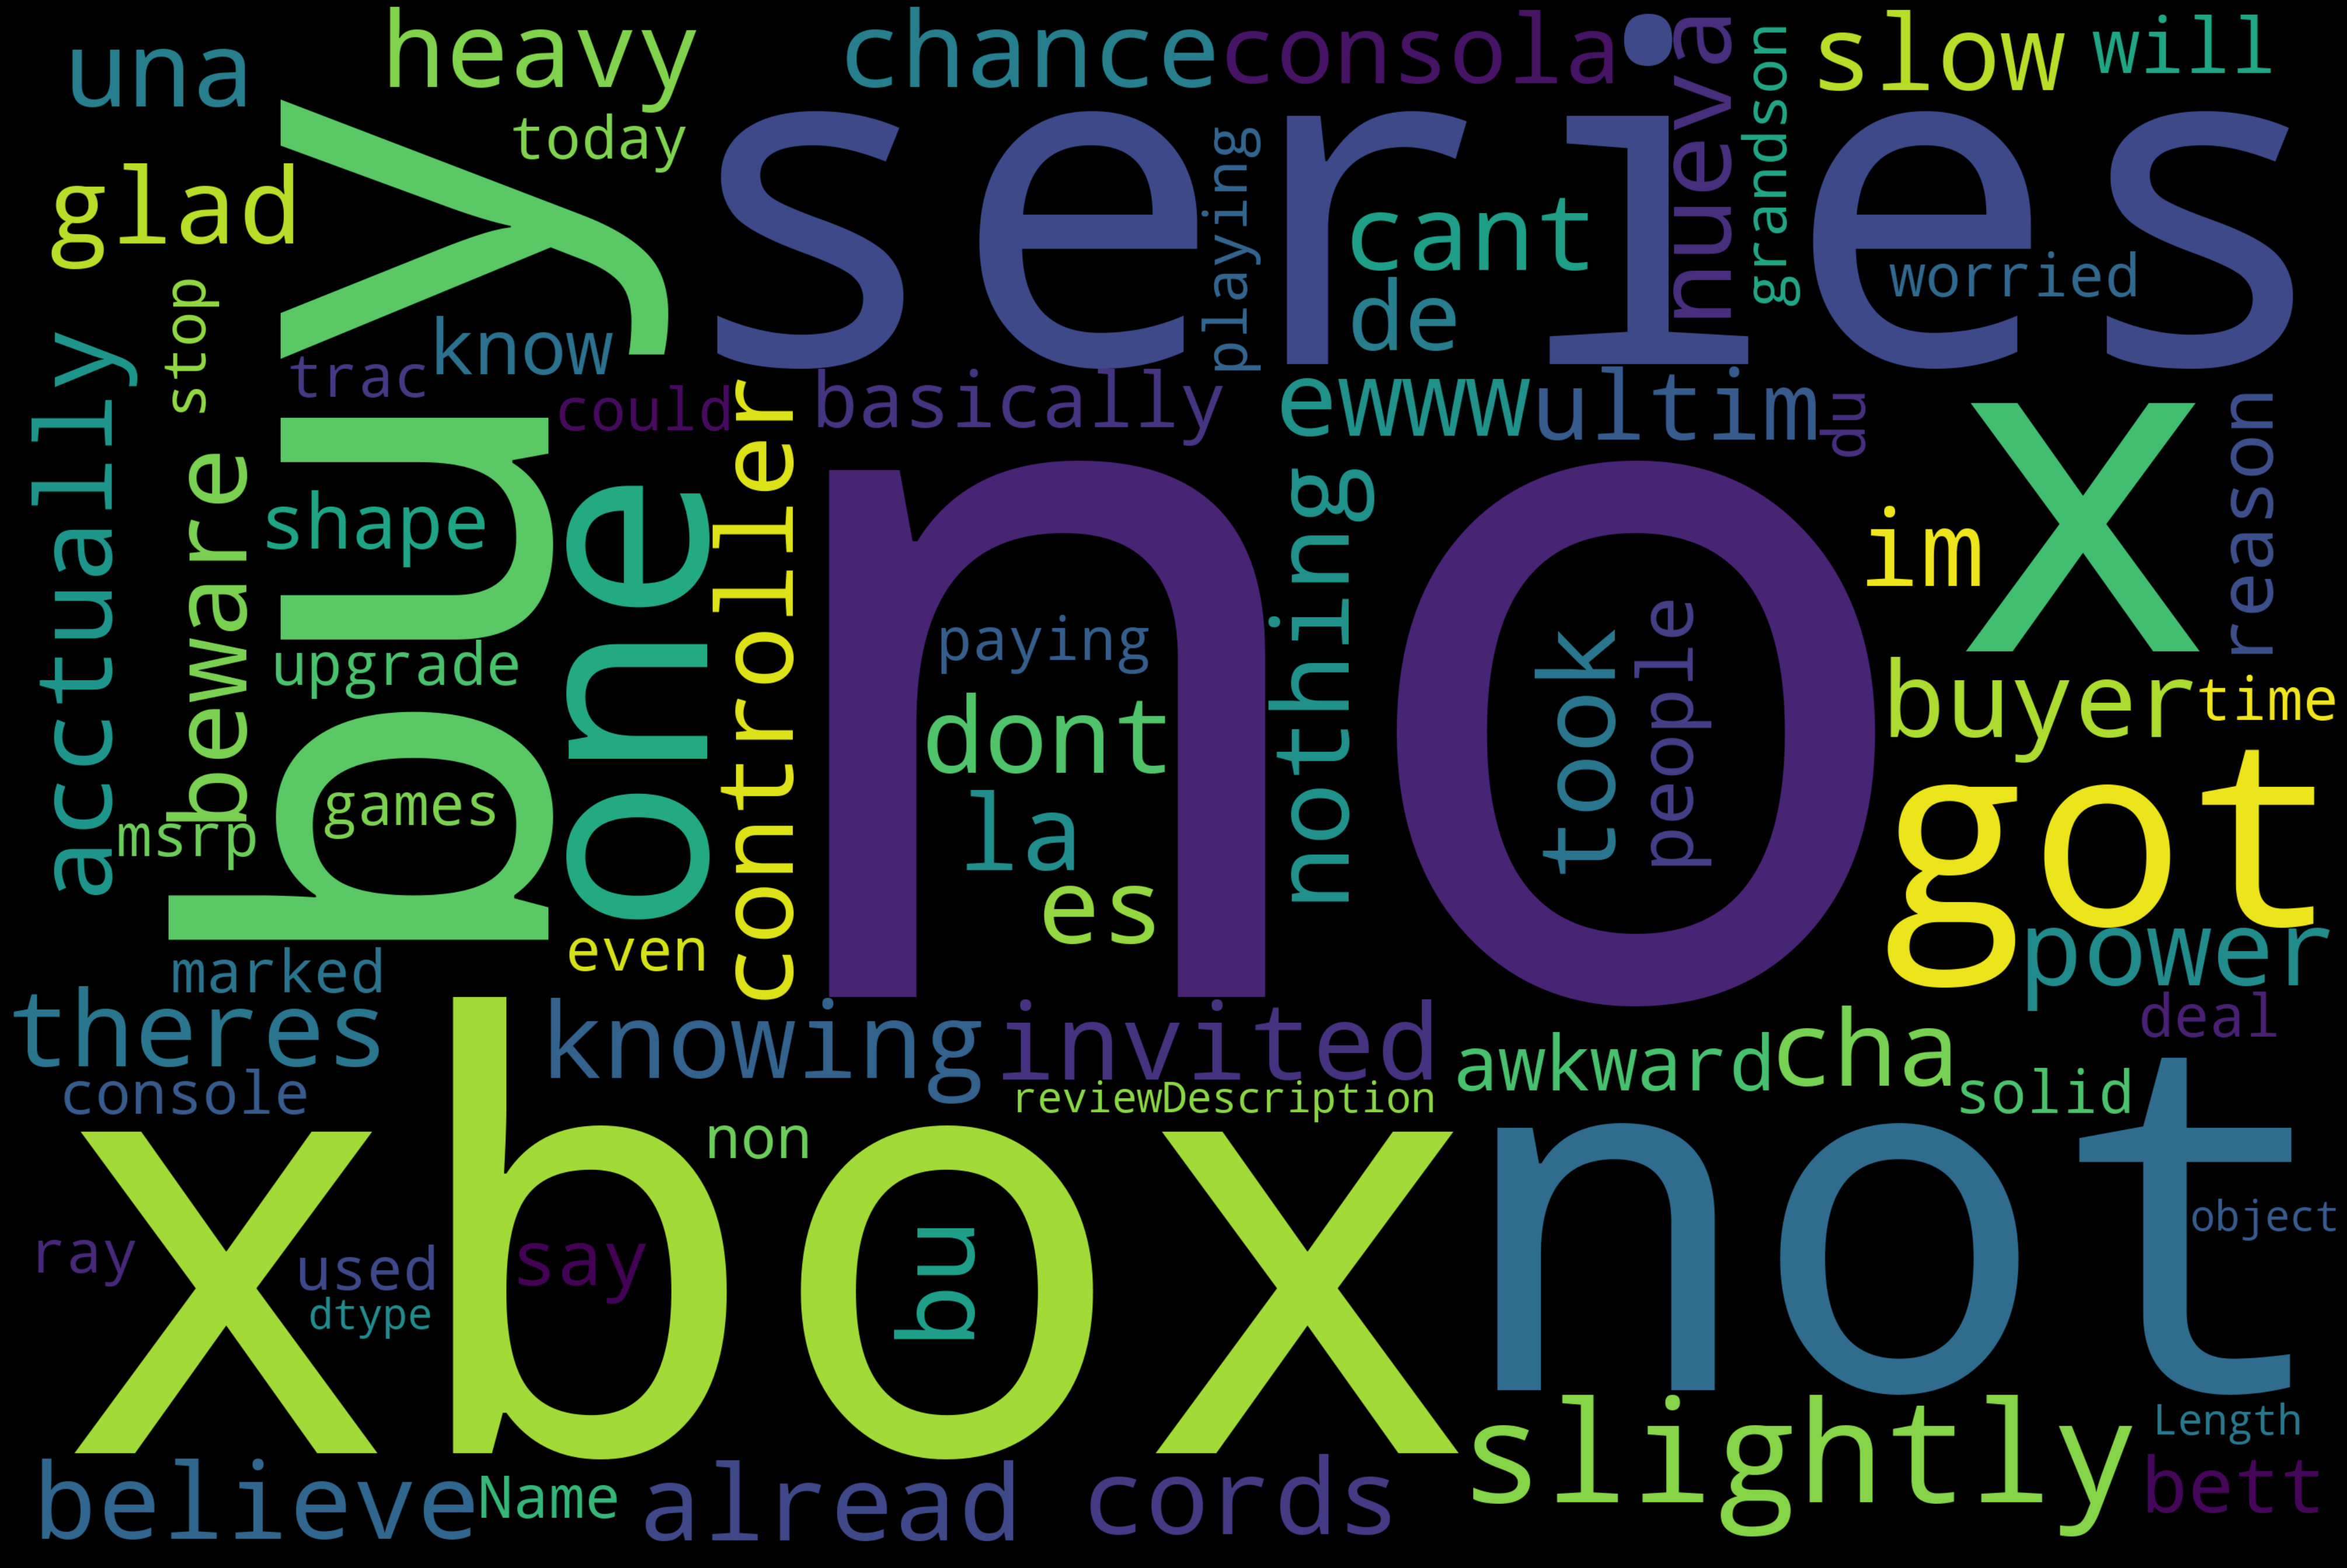

In [224]:

text = review_neg["reviewDescription"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [225]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
processed_reviews['sentiment']= label_encoder.fit_transform(processed_reviews['sentiment']) 
  
processed_reviews['sentiment'].unique() 

array([2, 0, 1])

In [226]:
processed_reviews['sentiment'].value_counts()

2    1416
0     280
1     190
Name: sentiment, dtype: int64

In [227]:
#Extracting 'reviews' for processing
review_features=processed_reviews.copy()
review_features=review_features[['reviewDescription']].reset_index(drop=True)
review_features.head()

reviewDescription
0  got series x today less hours placing order i’...
1  yeah new generation hardware microsoft but tal...
2  ready gaming experience unlike xbox series x r...
3  gotta say received invite purchase one serious...
4  gammer life owned almost every console since a...

ModuleNotFoundError: No module named 'dash'

In [229]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
processed_reviews['sentiment']= label_encoder.fit_transform(processed_reviews['sentiment']) 
  
processed_reviews['sentiment'].unique() 

array([2, 0, 1], dtype=int64)

In [230]:
processed_reviews['sentiment'].value_counts()


2    1416
0     280
1     190
Name: sentiment, dtype: int64

In [231]:
review_features=processed_reviews.copy()
review_features=review_features[['reviewDescription']].reset_index(drop=True)
review_features.head()

reviewDescription
0  got series x today less hours placing order i’...
1  yeah new generation hardware microsoft but tal...
2  ready gaming experience unlike xbox series x r...
3  gotta say received invite purchase one serious...
4  gammer life owned almost every console since a...

In [232]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviewDescription'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

In [233]:
corpus[3]


'gotta say receiv invit purchas one serious fenc much better could realli well initi reaction ho hum anoth xbox but fire game immedi notic fast load frame rate optim game insan realli enjoy smooth everyth even older unoptim game amount time save not sit wait game load crazi perform fantast no lag speak game load fast graphic detail awesom love love love xboxon downsid though play friend don t x if want play game game requir play nonoptim version make sad dont know xbox problem certain publishersonli glitch ive xbox forget sign reboot fix far said im realli happi purchas'

In [234]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviewDescription'])

In [235]:
X.shape


(1886, 5000)

In [236]:
#Getting the target variable(encoded)
y=processed_reviews['sentiment']

In [237]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 1416, 0: 280, 1: 190})
Resampled dataset shape Counter({2: 1416, 0: 1416, 1: 1416})


In [238]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [239]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [240]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7513255656872678
Decision Tree Test Accuracy: 0.7163345716537206
KNN Test Accuracy: 0.6878250591016549
SVC Test Accuracy: 0.7518518518518518
Naive Bayes Test Accuracy: 0.693526961612068


In [241]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))
LogisticRegression(C=10000.0, random_state=0)

LogisticRegression(C=10000.0, random_state=0)
The mean accuracy of the model is: 0.879472693032015


LogisticRegression(C=10000.0, random_state=0)

In [242]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


Confusion matrix, without normalization


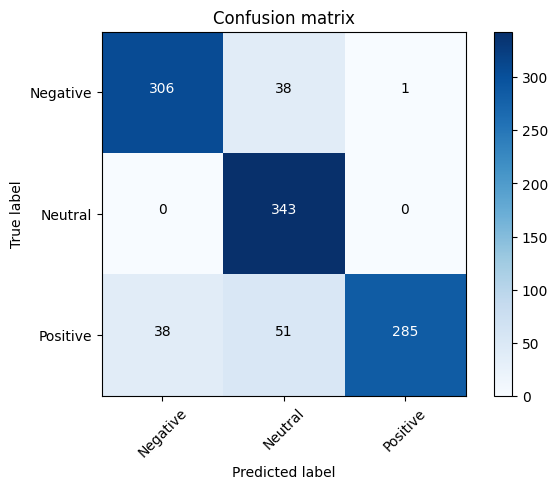

In [243]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [244]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       345
           1       0.79      1.00      0.89       343
           2       1.00      0.76      0.86       374

    accuracy                           0.88      1062
   macro avg       0.89      0.88      0.88      1062
weighted avg       0.90      0.88      0.88      1062



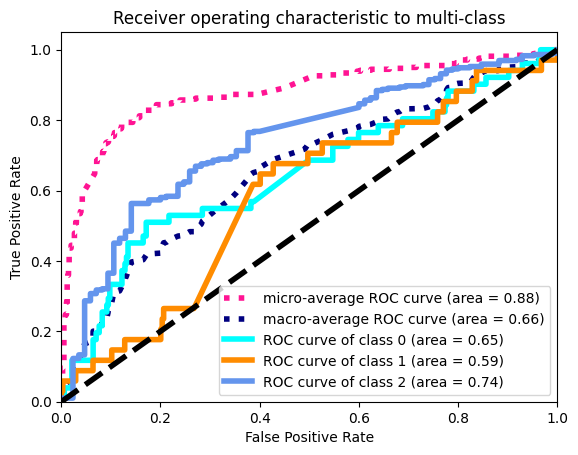

In [245]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
